<a href="https://colab.research.google.com/github/Saltire78/ITT_Labs/blob/main/Practical_4_Victor_Szultka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'>

# Data Analysis Lab
    
<font color='black'>

Content of todays Lab



*   Data Load and Check
*   Data analysis
*   Handling missing values
*   Feature Engineering
*   Prediction using sklearn model

In [161]:
# importing libs
import numpy as np # for manipulating multi dimensional arrays
import pandas as pd # data analysis library
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns # data visualisation

## Loading Data

In [162]:
train_data = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv")

In [163]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Feature Analysis



1. PassengerId : unique id number to each passenger
1. Survived : passenger survive(1) and died(0)
1. Pclass : passenger class
1. Name : name of passenger
1. Sex : gender of passenger
1. Age : age of passenger
1. SibSp : number of siblings/spouse
1. Parch : number of parent/children
1. Ticket : ticket number
1. Fare : amount of money spent on ticket
1. Cabin : cabin category
1. Embarked : port where passenger embarked (C= Cherbourg, Q=Quenntown, S = Southampton)




* int64(5)   : PassengerId, Survived, Pclass, SibSp and Parch
* object(5)  : Name, Sex, Ticket, Cabin and Embarked
* float64(2) : Age and Fare

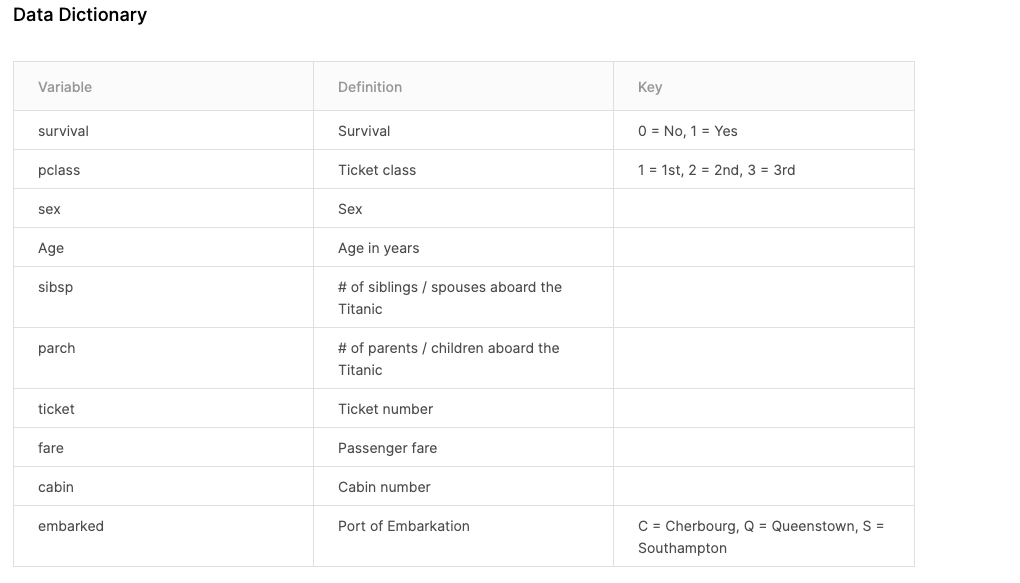

In [165]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [166]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


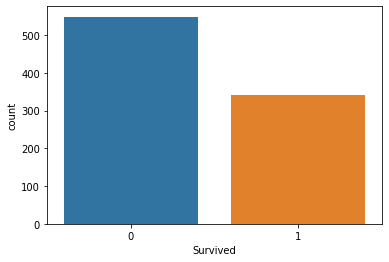

In [167]:
sns.countplot(train_data['Survived'])

## Selecting rows and columns

In [168]:
train_data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [169]:
# selecting multiple columns
train_data[['Sex','Name','Age','Survived']]

,Sex,Name,Age,Survived
0,male,"Braund, Mr. Owen Harris",22.0,0
1,female,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1
2,female,"Heikkinen, Miss. Laina",26.0,1
3,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1
4,male,"Allen, Mr. William Henry",35.0,0
...,...,...,...,...
886,male,"Montvila, Rev. Juozas",27.0,0
887,female,"Graham, Miss. Margaret Edith",19.0,1
888,female,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,0
889,male,"Behr, Mr. Karl Howell",26.0,1


In [170]:
# selecting specified rows
train_data.iloc[886:888]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S


## Sex: Survived and Died

In [171]:
train_data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


## Age: Survived and Died

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


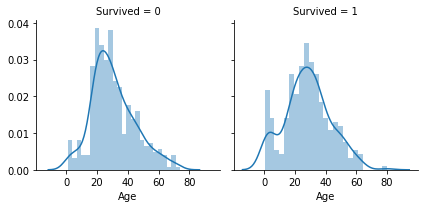

In [172]:
g=sns.FacetGrid(train_data,col = 'Survived')
g.map(sns.distplot, 'Age', bins = 25)
plt.show()

## Passenger Class: Survived and Died

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


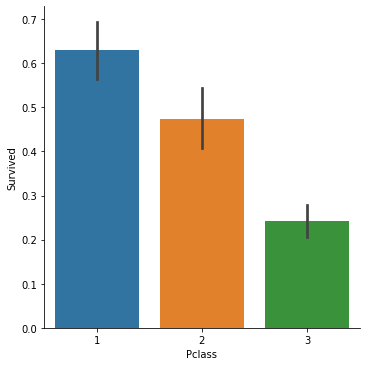

In [173]:
sns.factorplot(x='Pclass', y='Survived', data = train_data, kind = 'bar')

## Embarked: Survived and Died

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


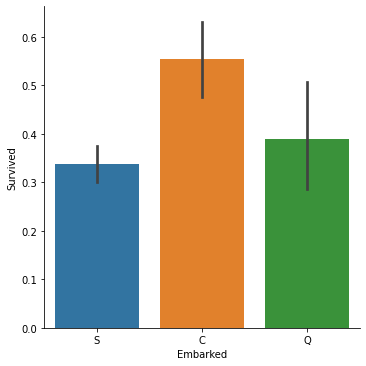

In [174]:
sns.factorplot(x='Embarked', y='Survived', data = train_data, kind = 'bar')

## Missing Values: NaN

In [175]:
train_data.columns[train_data.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [176]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Combining datasets for data analysis

In [177]:
data = pd.concat([train_data,test_data], axis=0).reset_index(drop=True)

In [178]:
print('Combined train and test data:', len(train_data),len(test_data),len(data))

Combined train and test data: 891 418 1309


## Filling Missing Data Values

Fare:

In [179]:
data['Fare'].isnull().sum()

1

In [180]:
np.mean(data['Fare'])

33.2954792813456

In [181]:
data['Fare']=data['Fare'].fillna(np.mean(data['Fare'])) # putting an average value in place of null

In [182]:
data['Fare'].isnull().sum()

0

Embarked:

In [183]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [184]:
data['Embarked'] = data['Embarked'].fillna('C')

In [185]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Feature Engineering (Adding new features)
family_size = Sibsp + Parch

In [186]:
data['family_size'] = data['SibSp'] + data['Parch']

In [187]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Encoding string/char to numerical variables

one hot encoding


* x = male, sex_0 = 1, sex_1 = 0

* x = female, sex_0 = 0, sex_1 = 1

In [188]:
data['Sex'] = data['Sex'].astype('category')

In [189]:
data = pd.get_dummies(data,columns=['Sex'])

In [190]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,Sex_female,Sex_male
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,1,0
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0,1


## Convering pclass to numeric

In [191]:
data['Pclass'] = data['Pclass'].astype('category')

In [192]:
data = pd.get_dummies(data,columns=['Pclass'])

## Converting Embarked to numeric

In [193]:
data['Embarked'] = data['Embarked'].astype('category')

In [194]:
data = pd.get_dummies(data,columns=['Embarked'])

In [195]:
data.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'family_size', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

## Drop unnecessary features

In [196]:
data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,family_size,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,0,1,0,0,1
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0,1,0,0,1,0,0
2,3,1.0,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,1,0,0,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,1,0,1,0,0,0,0,1
4,5,0.0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1,0,0,1


In [197]:
data.drop(labels=['Ticket', 'Cabin', 'Name', 'PassengerId'], axis = 1, inplace = True) # axis = 1 is column, axis = 0 is row, inplace is whether to overwrite

In [198]:
data.head()

,Survived,Age,SibSp,Parch,Fare,family_size,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,7.2500,1,0,1,0,0,1,0,0,1
1,1.0,38.0,1,0,71.2833,1,1,0,1,0,0,1,0,0
2,1.0,26.0,0,0,7.9250,0,1,0,0,0,1,0,0,1
3,1.0,35.0,1,0,53.1000,1,1,0,1,0,0,0,0,1
4,0.0,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1


## Data Normalization

Using min-max normalization
* x = (x-min(x)) / (max(x-min(x))

In [199]:
#data['Fare'] = (data['Fare'] - np.min(data['Fare'])/np.max(data['Fare'] - np.min(data['Fare'])))
data['Fare'] = (data['Fare'] - np.min(data['Fare'])) / (np.max(data['Fare'] - np.min(data['Fare'])))

In [200]:
#data['Age'] = (data['Age'] - np.min(data['Age'])/np.max(data['Age'] - np.min(data['Age'])))
data['Age'] = (data['Age'] - np.min(data['Age'])) / (np.max(data['Age'] - np.min(data['Age'])))

In [201]:
data.head()

,Survived,Age,SibSp,Parch,Fare,family_size,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.273456,1,0,0.014151,1,0,1,0,0,1,0,0,1
1,1.0,0.473882,1,0,0.139136,1,1,0,1,0,0,1,0,0
2,1.0,0.323563,0,0,0.015469,0,1,0,0,0,1,0,0,1
3,1.0,0.436302,1,0,0.103644,1,1,0,1,0,0,0,0,1
4,0.0,0.436302,0,0,0.015713,0,0,1,0,0,1,0,0,1


## Splitting Data into Training and Test datasets

In [202]:
print('Total data in train_data: {0}, test: {1}, total: {2}'.format(len(train_data), len(test_data), len(data)))

Total data in train_data: 891, test: 418, total: 1309


In [203]:
data[:15]

,Survived,Age,SibSp,Parch,Fare,family_size,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.273456,1,0,0.014151,1,0,1,0,0,1,0,0,1
1,1.0,0.473882,1,0,0.139136,1,1,0,1,0,0,1,0,0
2,1.0,0.323563,0,0,0.015469,0,1,0,0,0,1,0,0,1
3,1.0,0.436302,1,0,0.103644,1,1,0,1,0,0,0,0,1
4,0.0,0.436302,0,0,0.015713,0,0,1,0,0,1,0,0,1
5,0.0,NaN,0,0,0.016510,0,0,1,0,0,1,0,1,0
6,0.0,0.674308,0,0,0.101229,0,0,1,1,0,0,0,0,1
7,0.0,0.022924,3,1,0.041136,4,0,1,0,0,1,0,0,1
8,1.0,0.336089,0,2,0.021731,2,1,0,0,0,1,0,0,1
9,1.0,0.173243,1,0,0.058694,1,1,0,0,1,0,1,0,0


In [204]:
train = data[:len(train_data)]

In [205]:
test = data[len(train_data):]

In [206]:
train.head()

,Survived,Age,SibSp,Parch,Fare,family_size,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.273456,1,0,0.014151,1,0,1,0,0,1,0,0,1
1,1.0,0.473882,1,0,0.139136,1,1,0,1,0,0,1,0,0
2,1.0,0.323563,0,0,0.015469,0,1,0,0,0,1,0,0,1
3,1.0,0.436302,1,0,0.103644,1,1,0,1,0,0,0,0,1
4,0.0,0.436302,0,0,0.015713,0,0,1,0,0,1,0,0,1


In [207]:
test.tail()

,Survived,Age,SibSp,Parch,Fare,family_size,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
1304,NaN,NaN,0,0,0.015713,0,0,1,0,0,1,0,0,1
1305,NaN,0.486409,0,0,0.212559,0,1,0,1,0,0,1,0,0
1306,NaN,0.480145,0,0,0.014151,0,0,1,0,0,1,0,0,1
1307,NaN,NaN,0,0,0.015713,0,0,1,0,0,1,0,0,1
1308,NaN,NaN,1,1,0.043640,2,0,1,0,0,1,1,0,0


In [208]:
test = test.drop(labels=['Survived'], axis=1)

In [209]:
test.head()

,Age,SibSp,Parch,Fare,family_size,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
891,0.430039,0,0,0.015282,0,0,1,0,0,1,0,1,0
892,0.586622,1,0,0.013663,1,1,0,0,0,1,0,0,1
893,0.774521,0,0,0.018909,0,0,1,0,1,0,0,1,0
894,0.336089,0,0,0.016908,0,0,1,0,0,1,0,0,1
895,0.273456,1,1,0.023984,2,1,0,0,0,1,0,0,1


In [210]:
train.head()

,Survived,Age,SibSp,Parch,Fare,family_size,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.273456,1,0,0.014151,1,0,1,0,0,1,0,0,1
1,1.0,0.473882,1,0,0.139136,1,1,0,1,0,0,1,0,0
2,1.0,0.323563,0,0,0.015469,0,1,0,0,0,1,0,0,1
3,1.0,0.436302,1,0,0.103644,1,1,0,1,0,0,0,0,1
4,0.0,0.436302,0,0,0.015713,0,0,1,0,0,1,0,0,1


In [211]:
# Confirming survival removed from training dataset
print(len(train.columns))
print(len(test.columns))

14
13


## Using sklearn model to train and predict

In [212]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [213]:
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [215]:
y_train = train['Survived']

In [216]:
x_train = train.drop(labels=['Survived'], axis=1)

In [217]:
x_train.head()

,Age,SibSp,Parch,Fare,family_size,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.273456,1,0,0.014151,1,0,1,0,0,1,0,0,1
1,0.473882,1,0,0.139136,1,1,0,1,0,0,1,0,0
2,0.323563,0,0,0.015469,0,1,0,0,0,1,0,0,1
3,0.436302,1,0,0.103644,1,1,0,1,0,0,0,0,1
4,0.436302,0,0,0.015713,0,0,1,0,0,1,0,0,1


In [218]:
y_train

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [219]:
#X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [220]:
print(len(x_train),len(X_train),len(X_val))

891 712 179


## Creating model Logistic Regression

In [221]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          712 non-null    float64
 1   SibSp        712 non-null    int64  
 2   Parch        712 non-null    int64  
 3   Fare         712 non-null    float64
 4   family_size  712 non-null    int64  
 5   Sex_female   712 non-null    uint8  
 6   Sex_male     712 non-null    uint8  
 7   Pclass_1     712 non-null    uint8  
 8   Pclass_2     712 non-null    uint8  
 9   Pclass_3     712 non-null    uint8  
 10  Embarked_C   712 non-null    uint8  
 11  Embarked_Q   712 non-null    uint8  
 12  Embarked_S   712 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 38.9 KB


Handling missing value for *age*

In [223]:
model_logistic_reg = LogisticRegression(random_state=42)
model_logistic_reg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [227]:
print('Accuracy is {0} '.format((model_logistic_reg.score(X_val, Y_val))*100))

Accuracy is 79.3296089385475 


## Creating model for SVM

In [228]:
model_svc = SVC()
model_svc.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [229]:
print('Accuracy is {0} '.format((model_svc.score(X_val, Y_val))*100))

Accuracy is 79.88826815642457 


## Predicting Test Data

In [230]:
test.head()

,Age,SibSp,Parch,Fare,family_size,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
891,0.430039,0,0,0.015282,0,0,1,0,0,1,0,1,0
892,0.586622,1,0,0.013663,1,1,0,0,0,1,0,0,1
893,0.774521,0,0,0.018909,0,0,1,0,1,0,0,1,0
894,0.336089,0,0,0.016908,0,0,1,0,0,1,0,0,1
895,0.273456,1,1,0.023984,2,1,0,0,0,1,0,0,1


In [232]:
test_result = pd.Series(model_logistic_reg.predict(test),name='Survived').astype(int)

In [233]:
test_result

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [234]:
result_logistic_reg = pd.concat([test, test_result], axis=0)

In [235]:
result_logistic_reg

,0,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp,family_size
891,NaN,0.430039,0.0,1.0,0.0,0.015282,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
892,NaN,0.586622,0.0,0.0,1.0,0.013663,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
893,NaN,0.774521,0.0,1.0,0.0,0.018909,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
894,NaN,0.336089,0.0,0.0,1.0,0.016908,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
895,NaN,0.273456,0.0,0.0,1.0,0.023984,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
test_result_svc = pd.Series(model_svc.predict(test),name='Survived').astype(int)

In [237]:
test_result_svc

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64